C:\Users\adity\AppData\Local\Temp\ipykernel_3480\1306713462.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = df.groupby(['Event', 'Dive Number', 'Name']).mean().reset_index()
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


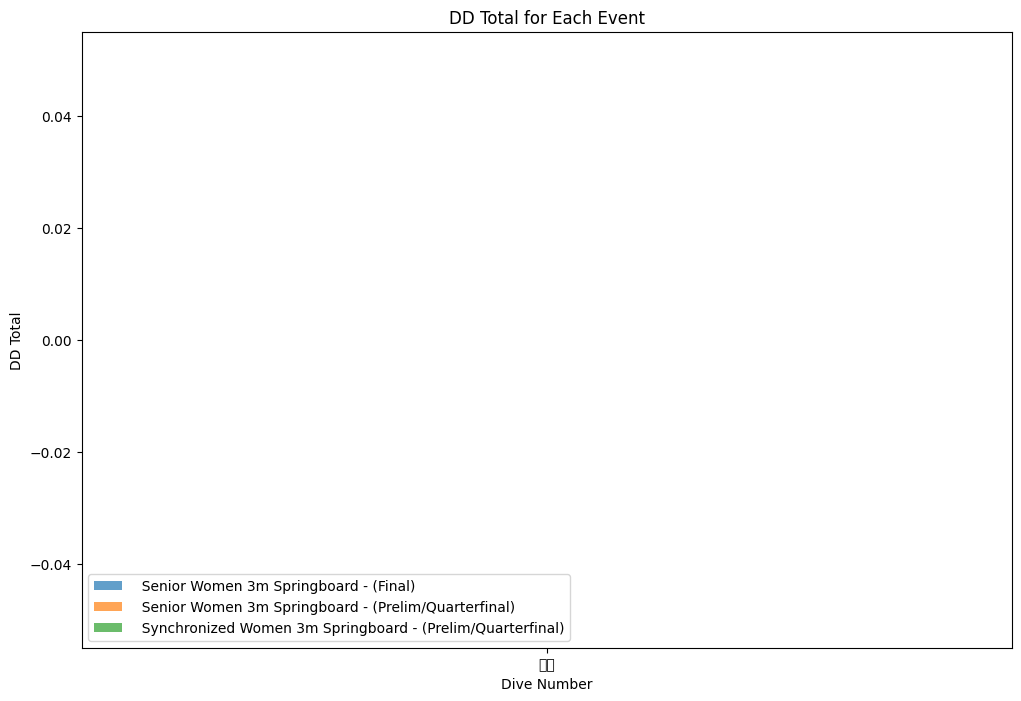

KeyError: 'Total'

<Figure size 1200x800 with 0 Axes>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


# Read the CSV file into a pandas DataFrame
df = pd.read_csv('new_output.csv')

# Group by events and dive number, and calculate the mean of numeric columns
grouped_data = df.groupby(['Event', 'Dive Number', 'Name']).mean().reset_index()

# Example 1: Bar plot of DD Total for each event
plt.figure(figsize=(12, 8))
for event, data in grouped_data.groupby('Event'):
    plt.bar(data['Dive Number'], data['DD Total'], label=event, alpha=0.7)

plt.xlabel('Dive Number')
plt.ylabel('DD Total')
plt.title('DD Total for Each Event')
plt.legend()
plt.show()

# Example 2: Scatter plot of Points vs. Score
# Example: Scatter plot of Total vs. Score
plt.figure(figsize=(12, 8))
plt.scatter(df['Total'], df['Score'], c=df['Event'].astype('category').cat.codes, cmap='viridis', alpha=0.5)
plt.xlabel('Total')
plt.ylabel('Score')
plt.title('Scatter Plot of Total vs. Score')
plt.show()


In [5]:
from flask import Flask
from flask_restful import Api, Resource
from scrapy.crawler import CrawlerProcess
from diving_scraper.spiders.diving import DivingSpider

app = Flask(__name__)
api = Api(app)

def run_spider():
    process = CrawlerProcess({
        'USER_AGENT': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'})
    process.crawl(DivingSpider)
    process.start()

class ScrapeResource(Resource):
    def get(self):
        run_spider()
        return {"message": "Scraping completed successfully!"}

api.add_resource(ScrapeResource, '/scrape')

if __name__ == '__main__':
    app.run(debug=True)


ModuleNotFoundError: No module named 'diving_scraper'